# INTRODUCTION
* Churn: 1 jika customer membatalkan layanan, 0 sebaliknya
* AccountWeeks: jumlah minggu pelanggan memiliki akun aktif
* ContractRenewal: 1 jika pelanggan baru saja memperbarui kontrak, 0 sebaliknya
* DataPlan: 1 jika pelanggan punya paket, 0 sebaliknya
* DataUsage: gigabyte penggunaan data bulanan
* CustServCalls:jumlah panggilan kecustomer service
* DayMins: rata-rata daytime minutes dalam sebulan
* DayCalls: jumlah rata-rata daycalls
* MonthlyCharge: tagihan bulanan rata-rata
* OverageFee: biaya overage terbesar dalam 12 bulan terakhir
* RoamMins: jumlah rata-rata menit roaming

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import Data

In [ ]:
from google.colab import files
file = files.upload()

Saving telecom_churn.csv to telecom_churn.csv


In [ ]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


# EDA & Visualisasi


In [ ]:
df.shape

(3333, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


Data tidak memiliki missing value dan tipe data sudah sesuai

In [ ]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [ ]:
def vis_univar(data, column):
    sns.color_palette("pastel")
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    
    sns.boxplot(data = df, x = column, ax = ax_box)
    sns.histplot(data = df, x = column, ax = ax_hist)
    
    ax_box.set(xlabel = '')
    ax_hist.set(ylabel = 'Histogram (Count)')
    
    plt.show()

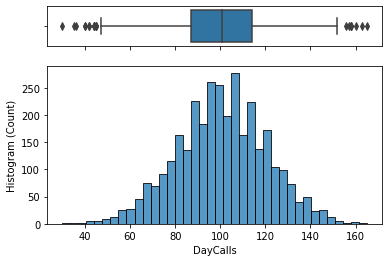

In [ ]:
vis_univar(df, 'DayCalls')

In [ ]:
df.loc[(df['DayCalls'] < 25)] 

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
1345,1,98,1,0,0.0,4,0.0,0,14.0,7.98,6.8
1397,0,101,1,0,0.3,1,0.0,0,20.0,9.61,7.2


In [ ]:
df.loc[df['DayCalls'] == 0]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins


Berdasarkan boxplot terdapat outlier pada kolom 'DayCalls' dimana terdapat 2 customer yang memiliki rata-rata telfon harian = 0 namun sudah berlangganan selama beberapa minggu dan membayar sewa bulanan. Oleh karena itu, kita dapat menghilangkannya.

In [ ]:
df = df[df['DayCalls'] != 0].reset_index(drop = True)
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3326,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3327,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3328,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3329,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


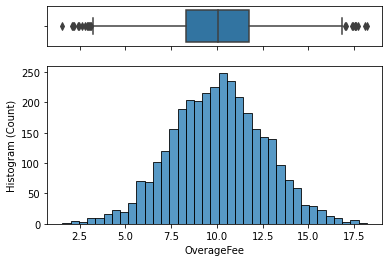

In [ ]:
vis_univar(df, 'OverageFee')

In [ ]:
df.loc[(df['OverageFee'] < 1.25)] 

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2930,0,97,1,0,0.0,1,209.2,134,36.0,0.0,11.8


Berdasarkan boxplot terdapat outlier pada kolom 'OverageFee' dimana terdapat 1 customer yang memiliki biaya langganan
tebesar yang dikeluarkan selama berlangganan = 0, padahal customer sudah berlangganan selama beberapa minggu dan
membayar sewa bulanan. Oleh karena itu, kita dapat menghilangkannya.

In [ ]:
df = df[df['OverageFee'] != 0].reset_index(drop = True)
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3325,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3326,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3327,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3328,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [ ]:
df.duplicated().sum()

0

tidak ada data duplicate

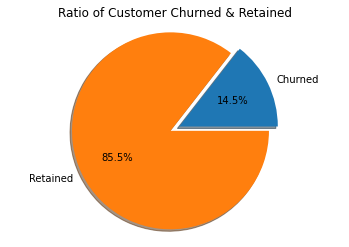

In [ ]:
labels = 'Churned', "Retained"
sizes = [df.Churn[df['Churn'] == 1].count(), df.Churn[df['Churn'] == 0].count()]
explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

plt.title("Ratio of Customer Churned & Retained")

plt.show()

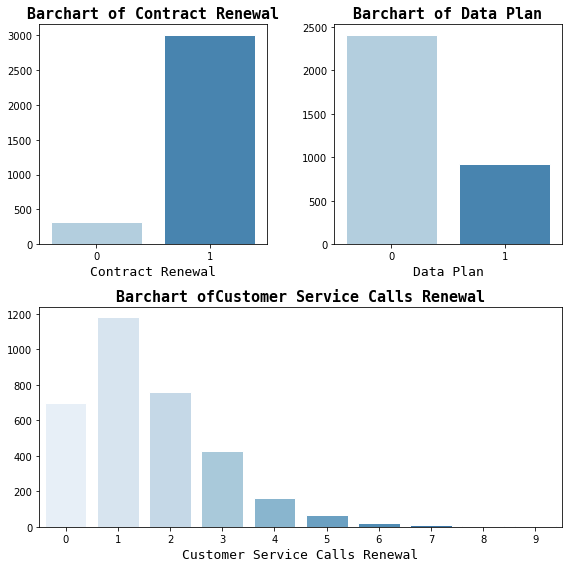

In [ ]:
ax = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.countplot(data = df , x = "ContractRenewal" , palette="Blues", edgecolor='w')
plt.title("Barchart of Contract Renewal" , size=15, fontweight='bold', fontfamily='monospace')
plt.xlabel("Contract Renewal", size=13, fontweight='light', fontfamily='monospace')
plt.ylabel('')

plt.subplot(2,2,2)
sns.countplot(data = df , x = "DataPlan" , palette="Blues", edgecolor='w')
plt.title("Barchart of Data Plan" , size=15, fontweight='bold', fontfamily='monospace')
plt.xlabel("Data Plan", size=13, fontweight='light', fontfamily='monospace')
plt.ylabel('')

plt.subplot(2,2,(3,4))
sns.countplot(data = df , x = "CustServCalls" , palette="Blues", edgecolor='w')
plt.title("Barchart ofCustomer Service Calls Renewal" , size=15, fontweight='bold', fontfamily='monospace')
plt.xlabel("Customer Service Calls Renewal", size=13, fontweight='light', fontfamily='monospace')
plt.ylabel('')
plt.tight_layout()

plt.show()

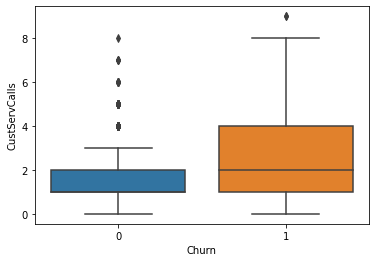

In [ ]:
sns.boxplot(x='Churn',y='CustServCalls', data=df)

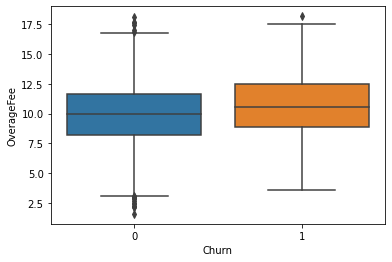

In [ ]:
sns.boxplot(x='Churn',y='OverageFee', data=df)

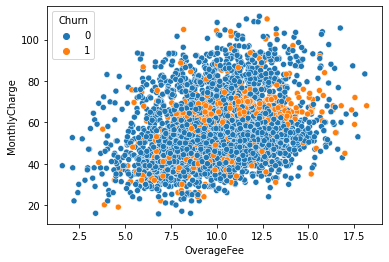

In [ ]:
sns.scatterplot(x='OverageFee',y='MonthlyCharge', hue='Churn', data=df)

In [ ]:
df.corr('spearman')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.015650,-0.260266,-0.101963,-0.101608,0.135571,0.172107,0.027612,0.095740,0.089233,0.061870
AccountWeeks,0.015650,1.000000,-0.029530,0.008700,0.016752,-0.005929,0.017880,0.032762,0.011696,-0.008040,0.014754
ContractRenewal,-0.260266,-0.029530,1.000000,-0.005825,-0.010375,0.030261,-0.049375,-0.012873,-0.044220,-0.010111,-0.043679
DataPlan,-0.101963,0.008700,-0.005825,1.000000,0.841460,-0.022031,0.002473,-0.013025,0.695705,0.022220,-0.004837
DataUsage,-0.101608,0.016752,-0.010375,0.841460,1.000000,-0.017501,-0.004304,-0.019274,0.646936,0.010829,0.076794
CustServCalls,0.135571,-0.005929,0.030261,-0.022031,-0.017501,1.000000,-0.014343,-0.020179,-0.025008,-0.017582,-0.016810
DayMins,0.172107,0.017880,-0.049375,0.002473,-0.004304,-0.014343,1.000000,0.007275,0.598671,0.006112,-0.017663
DayCalls,0.027612,0.032762,-0.012873,-0.013025,-0.019274,-0.020179,0.007275,1.000000,-0.010150,-0.013934,0.013430
MonthlyCharge,0.095740,0.011696,-0.044220,0.695705,0.646936,-0.025008,0.598671,-0.010150,1.000000,0.288312,0.054627
OverageFee,0.089233,-0.008040,-0.010111,0.022220,0.010829,-0.017582,0.006112,-0.013934,0.288312,1.000000,-0.003356


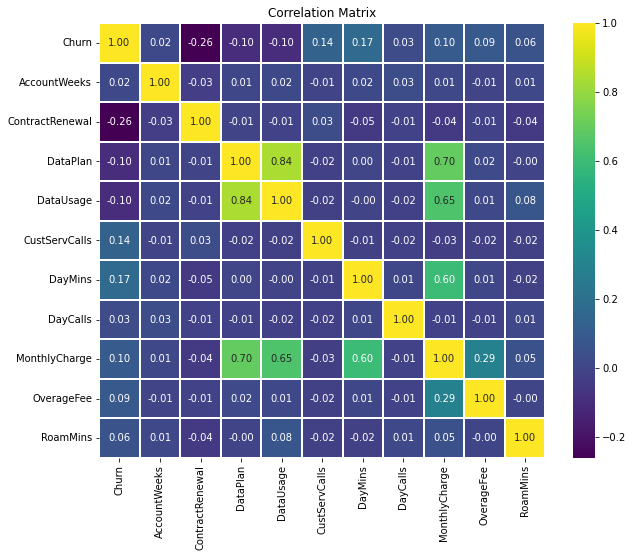

In [ ]:
plt.figure(figsize = (10, 8))
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, annot=True, cmap='viridis', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

In [ ]:
df.corr('pearson')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016600,-0.260266,-0.101963,-0.086950,0.207606,0.208102,0.021892,0.073979,0.093214,0.069167
AccountWeeks,0.016600,1.000000,-0.024718,0.002885,0.014358,-0.003769,0.006175,0.038712,0.012507,-0.006907,0.009506
ContractRenewal,-0.260266,-0.024718,1.000000,-0.005825,-0.019060,0.024439,-0.048964,-0.002958,-0.046793,-0.018664,-0.045721
DataPlan,-0.101963,0.002885,-0.005825,1.000000,0.945971,-0.017652,-0.002820,-0.012738,0.737945,0.020660,-0.001646
DataUsage,-0.086950,0.014358,-0.019060,0.945971,1.000000,-0.021516,0.002249,-0.009290,0.782307,0.018744,0.162581
CustServCalls,0.207606,-0.003769,0.024439,-0.017652,-0.021516,1.000000,-0.011989,-0.016729,-0.027095,-0.013081,-0.009032
DayMins,0.208102,0.006175,-0.048964,-0.002820,0.002249,-0.011989,1.000000,-0.003479,0.566412,0.006735,-0.012591
DayCalls,0.021892,0.038712,-0.002958,-0.012738,-0.009290,-0.016729,-0.003479,1.000000,-0.014681,-0.021172,0.017950
MonthlyCharge,0.073979,0.012507,-0.046793,0.737945,0.782307,-0.027095,0.566412,-0.014681,1.000000,0.280788,0.116246
OverageFee,0.093214,-0.006907,-0.018664,0.020660,0.018744,-0.013081,0.006735,-0.021172,0.280788,1.000000,-0.010748


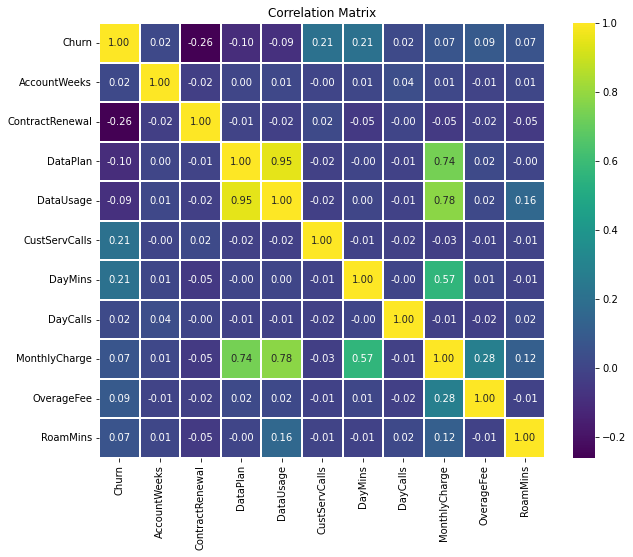

In [ ]:
plt.figure(figsize = (10, 8))
corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, annot=True, cmap='viridis', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

Dapat dilihat bahwa variabel yang memiliki korelasi tinggi adalah 'MonthlyCharge', 'DataPlan', dan 'DataUsage'. Hal ini dikarenakan nilai korelasi bernilai positif dan tinggi mendekati angka 1

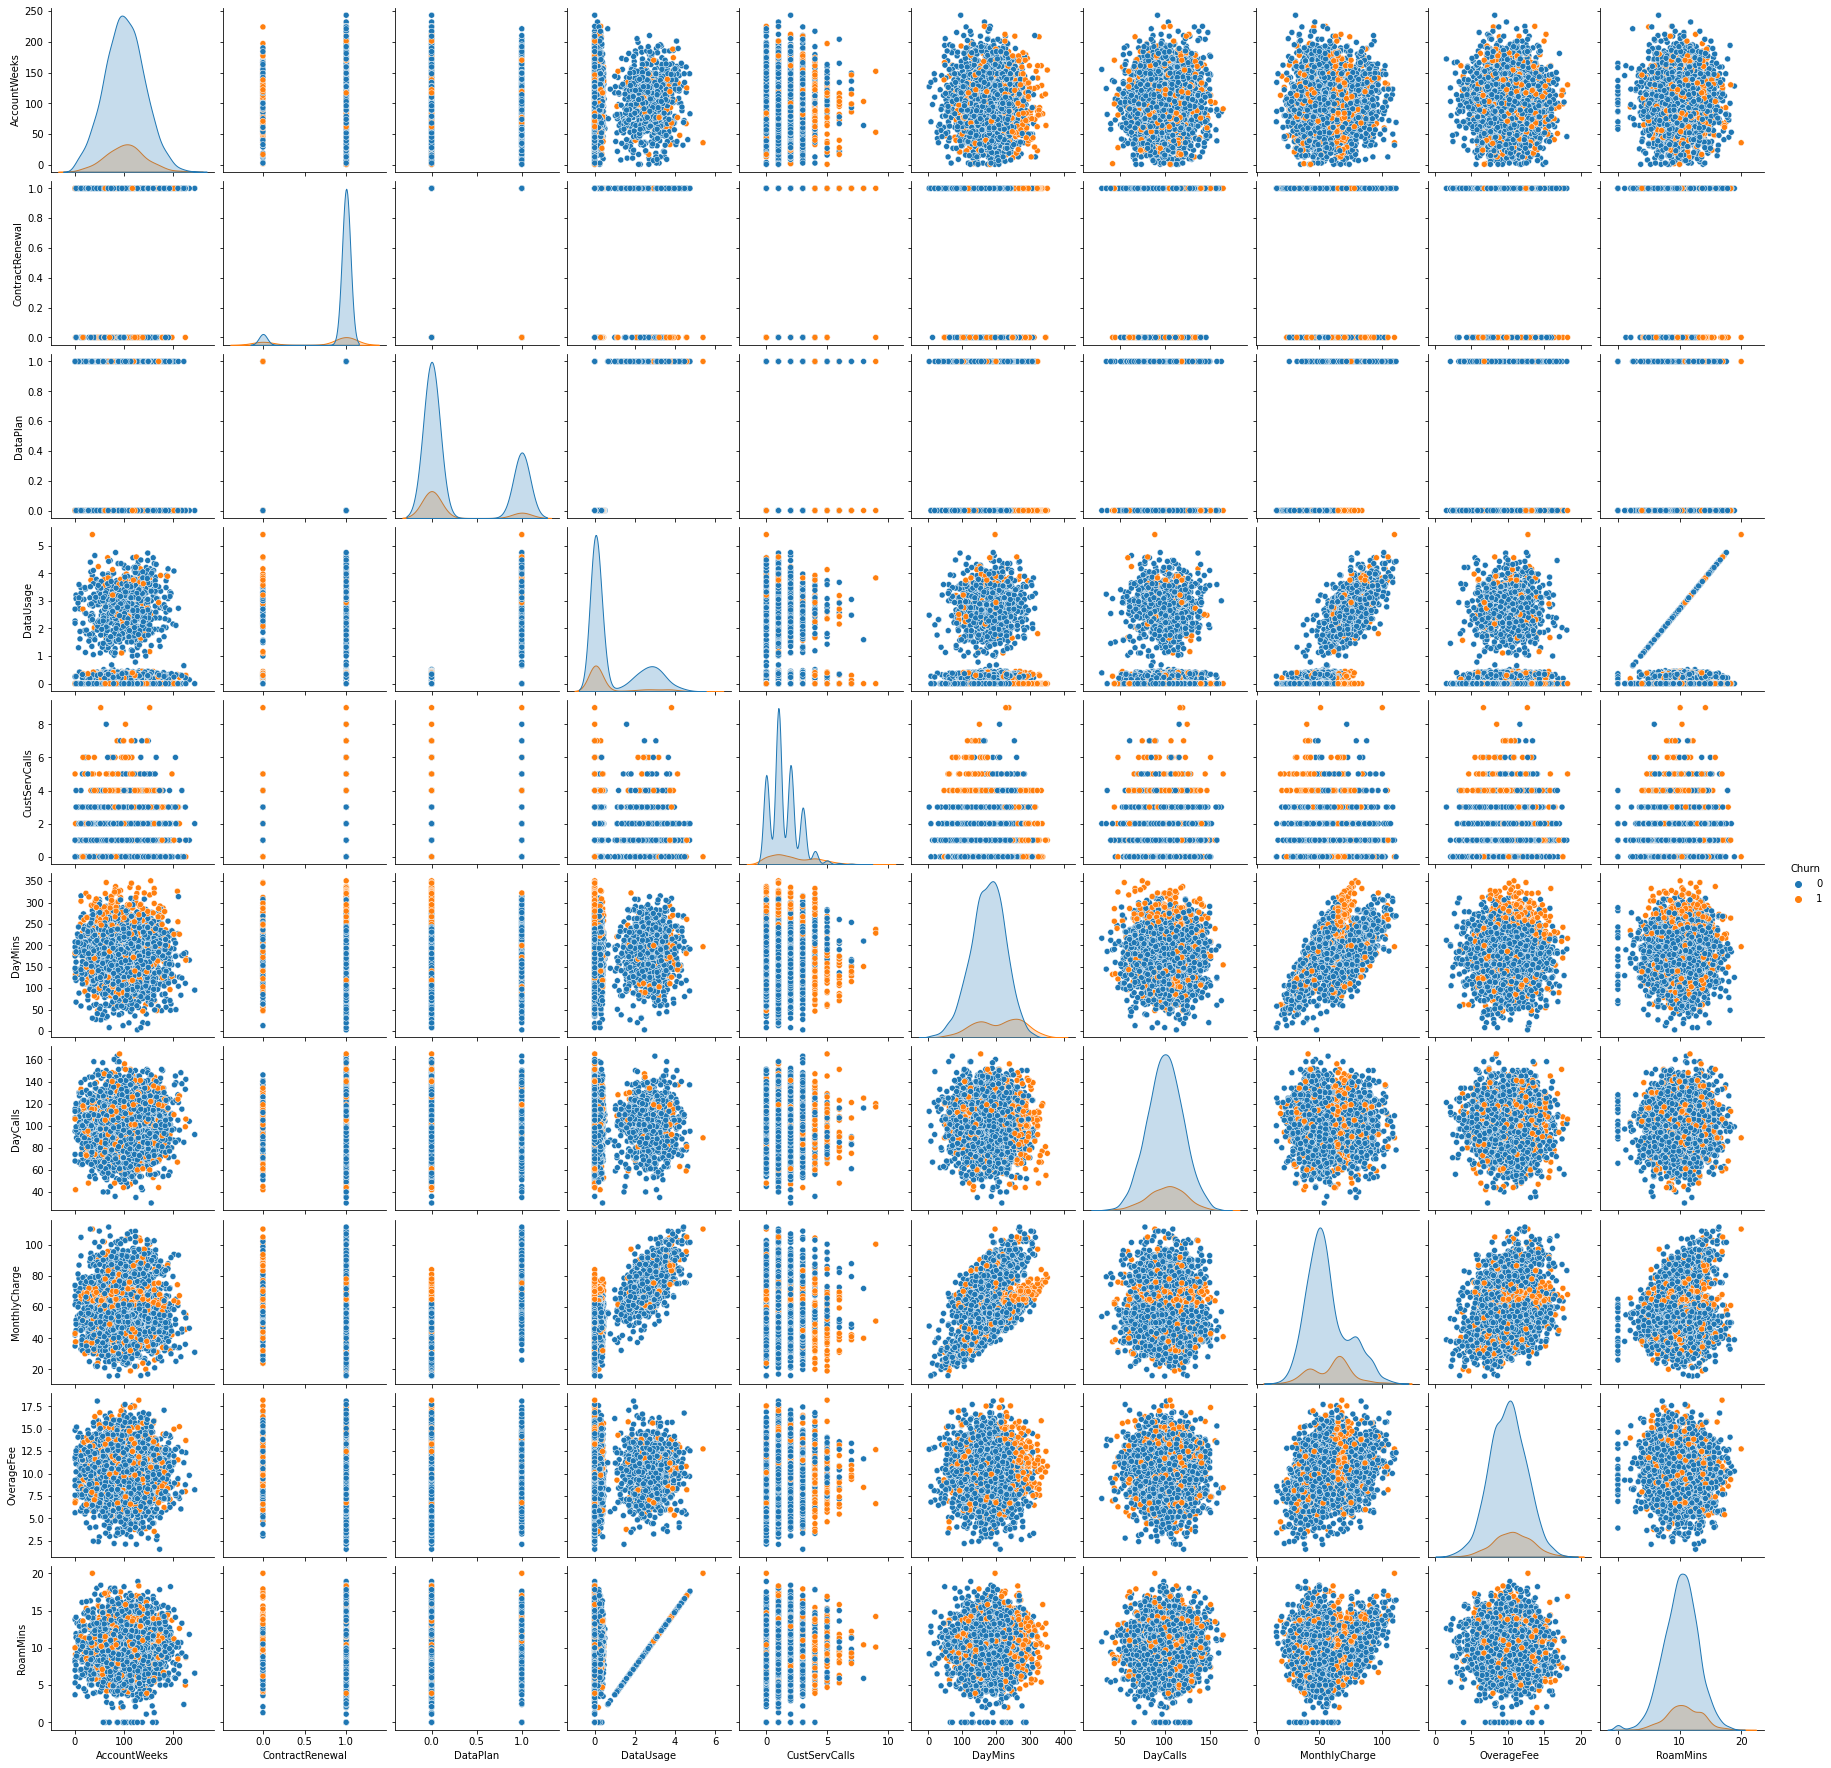

In [ ]:
sns.pairplot(df, hue="Churn")

Hal-hal yang terlihat dari pair plot diatas

* DataUsage memiliki hubungan linier dengan RoamMins untuk yang bukan 0. Ini perlu penyelidikan lebih lanjut untuk melihat apakah kita bisa menggunakan salah satu variabel saja.
* MonthlyCharge memiliki hubungan positif dengan DataUsage, DayMins, dan OverageFee



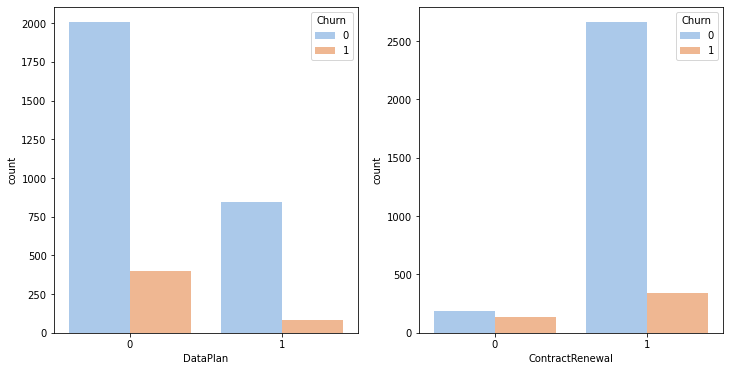

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='DataPlan', hue = 'Churn',data = df, ax=axarr[0], palette="pastel")
sns.countplot(x='ContractRenewal', hue = 'Churn',data = df, ax=axarr[1], palette="pastel")

* Berdasarkan hasil diatas, diketahui bahwa pelanggan yang tidak mempunyai paket data plan lebih banyak yang melakukan churn dibanding pelanggan yang mempunyai paket data
* ContractRenewal, pelanggan yang melakukan pembaruan kontrak lebih banyak melakukan churn dibanding tidak melakukan pembaruan kontrak.

In [ ]:
def piecharts (df, cat_variables, n_rows=None, n_cols=None, hue="Churn"):
    fig=plt.figure(figsize=(18,10))
    explode = (0, 0.1)
    labels=['Churned', 'Retained']
    for i, var in enumerate(cat_variables):
        df_0 = [len(df[(df[var]==0) & (df[hue]==1)]), len(df[(df[var]==0) & (df[hue]==0)])] #when the cat_var == 0
        
        ax0=fig.add_subplot(n_rows, n_cols, i+1)
        ax0.pie(df_0, explode=explode, labels=labels, autopct='%1.1f%%')
        ax0.set_title("Do not have {}".format(var))
        
    for i, var in enumerate(cat_variables):
        df_1 = [len(df[(df[var]!=0) & (df[hue]==1)]), len(df[(df[var]!=0) & (df[hue]==0)])] #when the cat_var == 1
        
        ax1=fig.add_subplot(n_rows, n_cols, i+1+n_rows)
        ax1.pie(df_1, explode=explode, labels=labels, autopct='%1.1f%%')
        ax1.set_title("Have {}".format(var))
    plt.show()

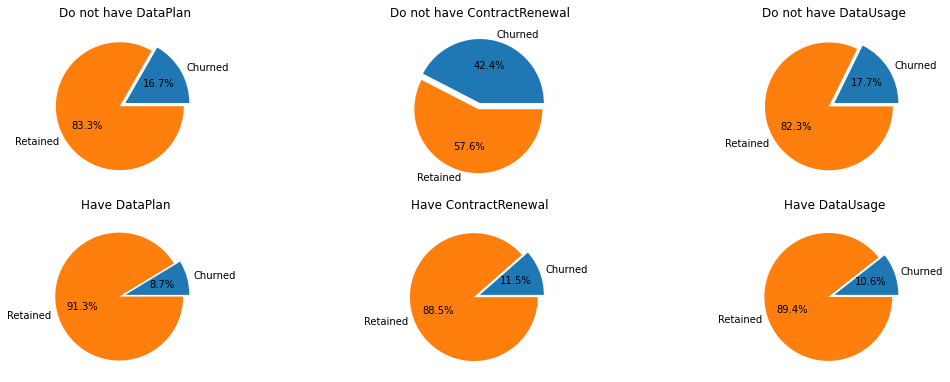

In [ ]:
cat_variables = df[["DataPlan", "ContractRenewal", "DataUsage"]] 

piecharts(df, cat_variables, 3, 3)

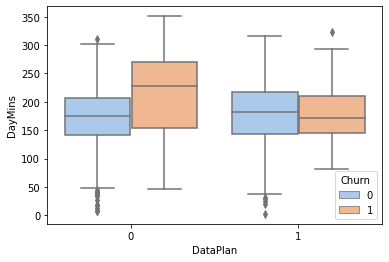

In [ ]:
fig = plt.subplots()
sns.boxplot(x='DataPlan', y="DayMins", hue = 'Churn', data = df, palette="pastel")

# Modelling 20 :80

In [ ]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True) 
RF.fit(x_train, y_train) 

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.9335585585585585

In [ ]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 25}

In [ ]:
rf_best = grid_search.best_estimator_
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

# Decision Tree

In [ ]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

In [ ]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_5 <= 264.45
|   |--- feature_4 <= 3.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_9 <= 13.10
|   |   |   |   |--- feature_8 <= 11.56
|   |   |   |   |   |--- feature_6 <= 48.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  48.00
|   |   |   |   |   |   |--- feature_8 <= 9.52
|   |   |   |   |   |   |   |--- feature_8 <= 9.03
|   |   |   |   |   |   |   |   |--- feature_0 <= 172.00
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 70.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 48.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  48.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_6 >  70.50
|   |   |   |   |   |   |   |   |   |   |--- feature_8 <= 7.83
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_8 >

# Evaluation Model

In [ ]:
#Evaluation
RF_pred= RF.predict(x_test)
dtree_pred = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, RF_pred))
print(confusion_matrix(y_test, dtree_pred))

[[579   5]
 [ 29  53]]
[[554  30]
 [ 25  57]]


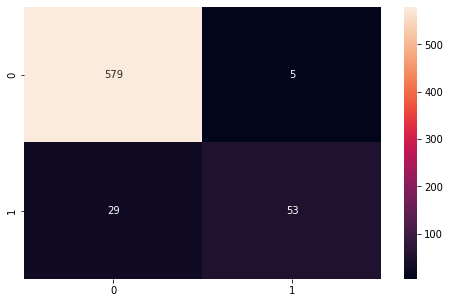

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,RF_pred), annot=True, fmt=".0f", ax=ax)

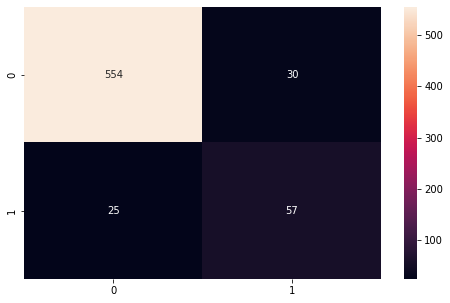

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, fmt=".0f", ax=ax)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, RF_pred, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, dtree_pred, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.8188899097895089
0.8218760441029067


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,RF_pred )) 
print(accuracy_score(y_test, RF_pred ))

print(classification_report(y_test,dtree_pred )) 
print(accuracy_score(y_test, dtree_pred ))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       584
           1       0.91      0.65      0.76        82

    accuracy                           0.95       666
   macro avg       0.93      0.82      0.86       666
weighted avg       0.95      0.95      0.95       666

0.948948948948949
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       584
           1       0.66      0.70      0.67        82

    accuracy                           0.92       666
   macro avg       0.81      0.82      0.81       666
weighted avg       0.92      0.92      0.92       666

0.9174174174174174


Hasil akurasi dengan menggunakan metode random forest menunjukkan angka sebesar 95%. Sedangkan dengan menggunakan metode decision tree menghasilkan nilai akurasi sebesar 92%. Oleh karena itu, dapat dikatakan bahwa metode random forest lebih baik dibandingkan metode decision tree

# Modelling 15:85

In [ ]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True) 
RF.fit(x_train, y_train) 

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.9349832985719879

In [ ]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50}

In [ ]:
rf_best = grid_search.best_estimator_
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

# Decision Tree

In [ ]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

In [ ]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_5 <= 264.45
|   |--- feature_4 <= 3.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_9 <= 13.10
|   |   |   |   |--- feature_8 <= 11.56
|   |   |   |   |   |--- feature_6 <= 48.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  48.00
|   |   |   |   |   |   |--- feature_8 <= 9.52
|   |   |   |   |   |   |   |--- feature_8 <= 9.03
|   |   |   |   |   |   |   |   |--- feature_0 <= 172.00
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 70.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_6 >  70.50
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 46.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_7 > 

# Evaluation Model

In [ ]:
#Evaluation
RF_pred= RF.predict(x_test)
dtree_pred = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, RF_pred))
print(confusion_matrix(y_test, dtree_pred))

[[434   2]
 [ 26  38]]
[[405  31]
 [ 23  41]]


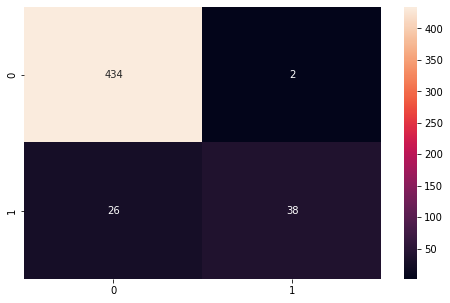

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,RF_pred), annot=True, fmt=".0f", ax=ax)

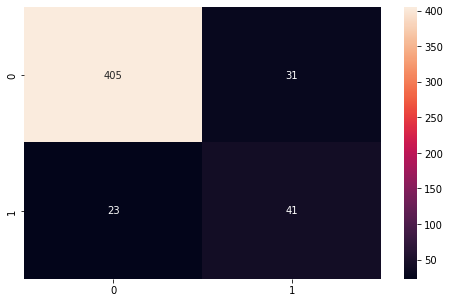

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, fmt=".0f", ax=ax)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, RF_pred, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, dtree_pred, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.7945814220183486
0.7847620412844037


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,RF_pred )) 
print(accuracy_score(y_test, RF_pred ))

print(classification_report(y_test,dtree_pred )) 
print(accuracy_score(y_test, dtree_pred ))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       436
           1       0.95      0.59      0.73        64

    accuracy                           0.94       500
   macro avg       0.95      0.79      0.85       500
weighted avg       0.94      0.94      0.94       500

0.944
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       436
           1       0.57      0.64      0.60        64

    accuracy                           0.89       500
   macro avg       0.76      0.78      0.77       500
weighted avg       0.90      0.89      0.89       500

0.892


Hasil akurasi dengan menggunakan metode random forest menunjukkan angka sebesar 94%. Sedangkan dengan menggunakan metode decision tree menghasilkan nilai akurasi sebesar 89.2%. Oleh karena itu, dapat dikatakan bahwa metode random forest lebih baik dibandingkan metode decision tree

# Modelling 10:90

In [ ]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True) 
RF.fit(x_train, y_train) 

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.9356021361815754

In [ ]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 100}

In [ ]:
rf_best = grid_search.best_estimator_
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

# Decision Tree

In [ ]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

In [ ]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_5 <= 264.45
|   |--- feature_4 <= 3.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_9 <= 13.10
|   |   |   |   |--- feature_8 <= 12.43
|   |   |   |   |   |--- feature_6 <= 48.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  48.00
|   |   |   |   |   |   |--- feature_6 <= 105.50
|   |   |   |   |   |   |   |--- feature_0 <= 207.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 121.50
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 6.15
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 78.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  78.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_8 >  6.15
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 43.35
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_

# Evaluation Model

In [ ]:
#Evaluation
RF_pred= RF.predict(x_test)
dtree_pred = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, RF_pred))
print(confusion_matrix(y_test, dtree_pred))

[[283   1]
 [ 15  34]]
[[264  20]
 [ 15  34]]


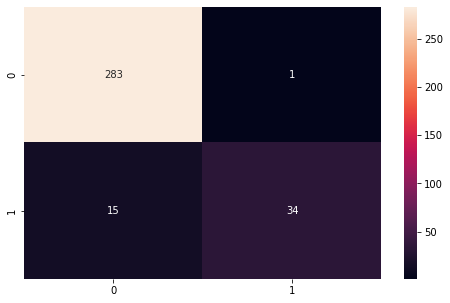

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,RF_pred), annot=True, fmt=".0f", ax=ax)

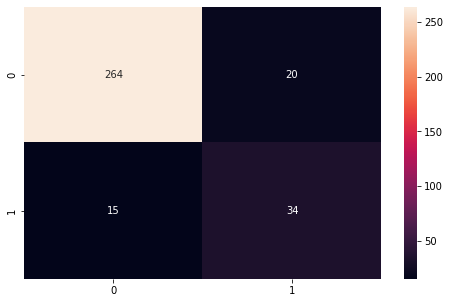

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, fmt=".0f", ax=ax)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, RF_pred, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, dtree_pred, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.8451782121299223
0.8117275079045703


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,RF_pred )) 
print(accuracy_score(y_test, RF_pred ))

print(classification_report(y_test,dtree_pred )) 
print(accuracy_score(y_test, dtree_pred ))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       284
           1       0.97      0.69      0.81        49

    accuracy                           0.95       333
   macro avg       0.96      0.85      0.89       333
weighted avg       0.95      0.95      0.95       333

0.9519519519519519
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       284
           1       0.63      0.69      0.66        49

    accuracy                           0.89       333
   macro avg       0.79      0.81      0.80       333
weighted avg       0.90      0.89      0.90       333

0.8948948948948949


Hasil akurasi dengan menggunakan metode random forest menunjukkan angka sebesar 95%. Sedangkan dengan menggunakan metode decision tree menghasilkan nilai akurasi sebesar 90%. Oleh karena itu, dapat dikatakan bahwa metode random forest lebih baik dibandingkan metode decision tree

##Faktor-faktor yang mempengaruhi churn

Text(0.5, 1.0, 'Feature Importances')

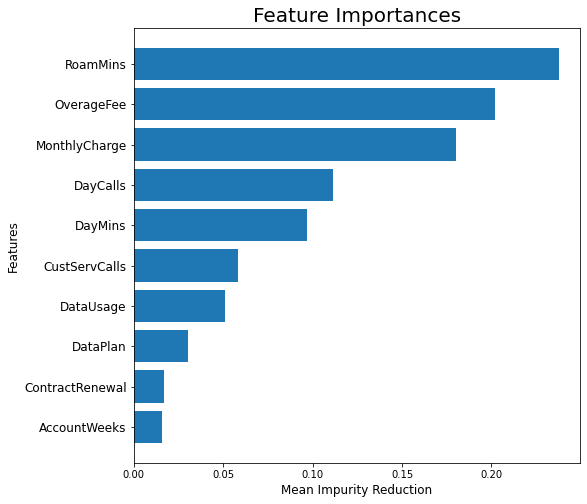

In [ ]:
#Feature Importance
tree_feature =  pd.Series(RF.feature_importances_, x.columns).sort_values(ascending = True)
plt.figure(figsize = (8,8))
plt.barh(x.columns, tree_feature)
plt.xlabel('Mean Impurity Reduction', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Feature Importances', fontsize = 20)

Dapat diketahui faktor-faktor yang mempengaruhi churn dari yang terbesar sampai terkecil yaitu RoamMins, OverageFee, MonthlyCharge, DayCalls, DayMins, CustServCalls, DataUsage, Data Plan, ContactRenewal, dan AccountWeeks.